# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

I am interested in exploring the kinds of facilities (walking and transit) are in proximity of the pipeline of affordable housing projects in Los Angeles. I would like to incorporate LA Metro GTFS data to add bus and train routes. I am mostly basing my projects around the LAHD Affordable Housing Project List and seeing what data can be tied to the area surrounding the sites. Through the data I am curious to see the trends, are projects mostly in census tracts with high transportation access? Are they in already dense areas?
The current data sets are the:
2021 Walk and Bike Counts https://data.lacity.org/dataset/2021-Walk-Bike-Count/9tzi-nz7g/about_data
LAHD Affordable Housing Project List https://data.lacity.org/Housing-and-Real-Estate/LAHD-Affordable-Housing-Projects-List-2003-to-Pres/mymu-zi3s/about_data
Transportation Index https://geohub.lacity.org/datasets/lahub::transportation-index/about
Vision Zero Prioritized Corridors https://geohub.lacity.org/datasets/ladot::vision-zero-prioritized-corridors/about


In [61]:
import pandas as pd
import json    
import requests
import pprint
pp = pprint.PrettyPrinter
!pip install geopandas
import geopandas as gpd
pd.set_option('display.max_columns', None)

In [3]:
lawalk_endpoint_url = "https://data.lacity.org/resource/9tzi-nz7g.json"
response = requests.get(lawalk_endpoint_url)
print(response.text[:500])


[{"_2023_index":"23-1","street_name":"1st St","limit_1":"Central Ave","limit_2":"San Pedro St","full_name":"1st St bw Central Ave & San Pedro St","facility_type":"Lane","ped_total":"2455","ped_female":"1030","ped_male":"1425","ped_mobassist":"14","ped_stroller":"1","ped_weekday":"985","ped_weekday_female":"396","ped_weekday_male":"589","ped_weekday_mobassist":"14","ped_weekday_stroller":"1","ped_weekend":"1470","ped_weekend_female":"634","ped_weekend_male":"836","ped_weekend_mobassist":"0","ped_


In [19]:
walk_counts = pd.read_json(lawalk_endpoint_url)
walk_counts.head()

,_2023_index,street_name,limit_1,limit_2,full_name,facility_type,ped_total,ped_female,ped_male,ped_mobassist,...,other_weekday_male,other_weekday_sidewalk,other_weekday_contraflow,other_weekday_helmet,other_weekend_total,other_weekend_female,other_weekend_male,other_weekend_sidewalk,other_weekend_contraflow,other_weekend_helmet
0,23-1,1st St,Central Ave,San Pedro St,1st St bw Central Ave & San Pedro St,Lane,2455,1030,1425,14,...,13.0,10.0,1.0,9.0,7,0.0,7.0,5.0,0.0,0.0
1,23-2,1st St,Soto St,Mathews St,1st St bw Soto St & Mathews St,Lane,184,36,148,7,...,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0
2,23-3,4th St,Rossmore Ave,Arden Blvd,4th St bw Rossmore Ave & Arden Blvd,Sharrow,354,195,159,0,...,3.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,23-4,54th St,Gramercy Pl,Ruthelen St,54th St bw Gramercy Pl & Ruthelen St,Lane,185,71,114,2,...,4.0,4.0,0.0,0.0,2,0.0,2.0,1.0,1.0,0.0
4,23-5,5th St,Main St,Spring St,5th St bw Main St & Spring St,Protected Lane,2810,807,2003,68,...,16.0,9.0,3.0,0.0,6,1.0,5.0,4.0,1.0,1.0


In [37]:
walk_counts.columns

Index(['_2023_index', 'street_name', 'limit_1', 'limit_2', 'full_name',
       'facility_type', 'ped_total', 'ped_female', 'ped_male', 'ped_mobassist',
       'ped_stroller', 'ped_weekday', 'ped_weekday_female', 'ped_weekday_male',
       'ped_weekday_mobassist', 'ped_weekday_stroller', 'ped_weekend',
       'ped_weekend_female', 'ped_weekend_male', 'ped_weekend_mobassist',
       'ped_weekend_stroller', 'bike_total', 'bike_female', 'bike_male',
       'bike_sidewalk', 'bike_contraflow', 'bike_bikeshare', 'bike_helmet',
       'bike_weekday_total', 'bike_weekday_female', 'bike_weekday_male',
       'bike_weekday_sidewalk', 'bike_weekday_contraflow',
       'bike_weekday_bike_weekdayshare', 'bike_weekday_helmet',
       'bike_weekend_total', 'bike_weekend_female', 'bike_weekend_male',
       'bike_weekend_sidewalk', 'bike_weekend_contraflow',
       'bike_weekend_bike_weekendshare', 'bike_weekend_helmet',
       'scooter_total', 'scooter_female', 'scooter_male', 'scooter_sidewalk',
    

In [5]:
#group by facility type, review lowest ped counts
#I want to geocode the count intersections

In [21]:
ft_totals = walk_counts[['facility_type', 'ped_total','ped_female','ped_male','ped_mobassist']].groupby('facility_type').sum()
ft_totals

,ped_total,ped_female,ped_male,ped_mobassist
facility_type,,,,
Buffered Lane,1124,425,699,7
Lane,19533,8519,11014,95
None,43256,17925,25331,279
Path,2056,799,1257,7
Protected Lane,26884,9498,17386,263
Route,1768,834,934,8
Sharrow,1952,819,1133,5


In [24]:
st_totals = walk_counts[['street_name', 'ped_total','ped_female','ped_male','ped_mobassist']].groupby('street_name').sum()
st_totals

,ped_total,ped_female,ped_male,ped_mobassist
street_name,,,,
1st St,2639,1066,1573,21
4th St,354,195,159,0
54th St,185,71,114,2
5th St,2810,807,2003,68
6th St,2305,748,1557,43
...,...,...,...,...
Wilmington Ave,226,96,130,5
Wilshire Blvd,1417,551,866,4
Winnetka Ave,12,5,7,0


In [6]:
la_tindex_endpoint_url = "https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/Transportation_Index/FeatureServer/99/query?outFields=*&where=1%3D1&f=geojson"
response = requests.get(la_tindex_endpoint_url)
print(response.text[:1000])

{"type":"FeatureCollection","features":[{"type":"Feature","id":1,"geometry":{"type":"Polygon","coordinates":[[[-118.297931242481,34.2632272511851],[-118.297914063364,34.2632269364517],[-118.296972481548,34.2632211981564],[-118.296031297275,34.2632154515662],[-118.295681227894,34.2632133121419],[-118.295154850125,34.2632100897881],[-118.29435058916,34.2632051781571],[-118.294203823936,34.2628910400769],[-118.29330595072,34.2628808532104],[-118.292313419236,34.2628698163477],[-118.29132088696,34.2628584693365],[-118.29008475398,34.2628438783159],[-118.288479219454,34.2628249076181],[-118.287640326168,34.2628150881203],[-118.286817584542,34.2628051686517],[-118.286498556957,34.2628014722563],[-118.285753978282,34.2626434431704],[-118.284925706476,34.262467552388],[-118.284922471315,34.261781689132],[-118.284911548953,34.2594836341982],[-118.284939939569,34.2582704595097],[-118.284946422491,34.2579787574021],[-118.284973151806,34.2567738031694],[-118.284992652559,34.2558941331282],[-118.28

In [7]:
gpd.read_file(la_tindex_endpoint_url).head()

,OBJECTID,TRACT00,TRACT,Total_Pop,Sq_Mi,PopSqMi,WLK,BK,WLKnBK,WLKnBK_SS_Rev,...,MV_PED_HIT,MV_BP_HIT_10k,MV_BP_HIT_10k_SS,MV_PD_Un18,MV_PD_Un18_10k,MV_PD_Un18_10k_SS,INDEX_SCORE,Shape__Area,Shape__Length,geometry
0,1,101110,101110,4283.0,0.441083,9710.0,0.0,0.0,0.0,100.000000,...,10,28.017745,0.777322,7,16.343684,4.797662,67.824926,1.229550e+07,15083.490095,"POLYGON ((-118.29793 34.26323, -118.29791 34.2..."
1,2,101122,101122,3405.0,1.020866,3335.0,0.5,0.0,0.5,99.312242,...,3,8.810573,0.244440,1,2.936858,0.862110,68.815715,2.637831e+07,30895.536646,"POLYGON ((-118.29101 34.27478, -118.29114 34.2..."
2,3,101210,101210,6347.0,0.251232,25263.0,2.4,0.0,2.4,96.698762,...,20,37.813140,1.049084,5,7.877738,2.312497,64.636466,7.002749e+06,12066.880686,"POLYGON ((-118.28594 34.25590, -118.28594 34.2..."
3,4,101220,101220,3702.0,0.269871,13718.0,0.5,0.0,0.5,99.312242,...,8,29.713668,0.824373,2,5.402485,1.585891,64.515714,7.523373e+06,12697.819097,"POLYGON ((-118.27818 34.25577, -118.27824 34.2..."
4,5,101300,101300,3884.0,0.996294,3898.0,0.0,0.0,0.0,100.000000,...,13,43.769310,1.214331,2,5.149331,1.511578,66.715402,2.774817e+07,29295.933607,"POLYGON ((-118.27531 34.25990, -118.27408 34.2..."


#Have trouble locating the codebook for this index: The Transportation Index was developed to compare conditions of one place to another. The Index standardizes transportation demand, transportation infrastructure, and injury variables, and then averages them together, yielding a score on a scale of 0-100. Higher values indicate worse transportation conditions. Variables include: percent walk and bike to work (2019 5-Year ACS), transit riders (2019 Metro), transit service frequency (2019 Metro), bicycle infrastructure (2021 LADOT), intersection density (2019 City of Los Angeles Department of City Planning), and bike and pedestrian injuries per 10,000 (2020 Statewide Integrated Traffic Records System). Data were classified using the quantile method.

In [35]:
transpo_index = gpd.read_file(la_tindex_endpoint_url)
transpo_index.columns
#compare PopSqMi to Metro, BK_LN_Mi, MV_BP_HIT_10k, Intersection Density
#what tracts have highest PopSqMi to Metro, BK_LN_Mi, MV_BP_HIT_10k, Intersection Density, can we make that a chloropleth?
#see what outliers have low pop but hight HIT or high index score

Index(['OBJECTID', 'TRACT00', 'TRACT', 'Total_Pop', 'Sq_Mi', 'PopSqMi', 'WLK',
       'BK', 'WLKnBK', 'WLKnBK_SS_Rev', 'WLKnBK_SS', 'Metro', 'Metro_SS_Rev',
       'Metro_SS', 'INTRSC_D', 'INTRSC_D_SS_Rev', 'INTRSC_D_SS', 'BK_LN_Mi',
       'BK_LN_Mi_SS_Rev', 'BK_LN_Mi_SS', 'MTS', 'MTS_SS_Rev', 'MTS_SS',
       'MV_BIKE_HIT', 'MV_PED_HIT', 'MV_BP_HIT_10k', 'MV_BP_HIT_10k_SS',
       'MV_PD_Un18', 'MV_PD_Un18_10k', 'MV_PD_Un18_10k_SS', 'INDEX_SCORE',
       'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

In [63]:
transpo_index.describe()

,OBJECTID,TRACT,Total_Pop,Sq_Mi,PopSqMi,WLK,BK,WLKnBK,WLKnBK_SS_Rev,WLKnBK_SS,Metro,Metro_SS_Rev,Metro_SS,INTRSC_D,INTRSC_D_SS_Rev,INTRSC_D_SS,BK_LN_Mi,BK_LN_Mi_SS_Rev,BK_LN_Mi_SS,MTS,MTS_SS_Rev,MTS_SS,MV_BIKE_HIT,MV_PED_HIT,MV_BP_HIT_10k,MV_BP_HIT_10k_SS,MV_PD_Un18,MV_PD_Un18_10k,MV_PD_Un18_10k_SS,INDEX_SCORE,Shape__Area,Shape__Length
count,1003.000000,1003.000000,998.000000,1002.000000,998.000000,998.000000,998.000000,998.000000,998.000000,1002.000000,925.000000,925.000000,929.000000,1003.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,999.000000,999.000000,1003.000000,999.000000,999.000000,997.000000,1.003000e+03,1003.000000
mean,502.000000,204222.535394,3974.866733,0.467725,17446.530060,3.570541,1.003908,4.574449,93.707773,6.267108,2036.318919,98.563789,1.430027,186.110360,71.100499,28.899501,0.828732,8.717804e+01,13.449869,1.152542,97.598870,2.401130,19.750748,28.277168,310.985423,4.378687,10.151545,33.144259,8.003542,65.786548,1.329288e+07,15314.372196
std,289.685462,115094.126675,1334.509966,0.827818,13906.925826,6.282544,1.837445,7.063803,9.716373,9.705062,6680.413165,4.700390,4.691193,76.730655,11.914853,11.914853,1.113640,1.401711e+01,18.073780,2.849810,5.937105,5.937105,21.038262,25.774025,4672.049422,22.426481,8.510471,106.206419,8.363654,4.702967,2.446216e+07,11366.093471
min,1.000000,101110.000000,5.000000,0.027011,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.935816,0.000000,0.145315,0.000000,-1.981130e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.562781,5.374438e+05,3050.533530
25%,251.500000,131250.000000,3042.500000,0.169985,8473.250000,0.700000,0.000000,1.200000,92.709766,1.650619,254.000000,98.726267,0.179449,139.533450,64.679780,21.666967,0.137207,8.207784e+01,2.226801,0.000000,95.833333,0.000000,8.000000,12.000000,56.113492,1.545844,4.000000,10.552239,3.093919,64.266035,4.753055e+06,9599.170209
50%,502.000000,201504.000000,3804.500000,0.273316,14018.000000,1.900000,0.400000,2.600000,96.423659,3.576341,716.000000,99.493322,0.503863,181.017200,71.891372,28.108628,0.553347,9.112686e+01,8.980528,0.000000,100.000000,0.000000,15.000000,22.000000,99.009901,2.727754,8.000000,21.130481,6.201726,66.063105,7.693584e+06,12507.110377
75%,752.500000,234850.500000,4787.500000,0.467396,22400.750000,3.900000,1.400000,5.300000,98.349381,7.290234,1810.000000,99.818440,1.272326,227.459250,78.333033,35.320220,1.110547,9.777320e+01,18.023576,2.000000,100.000000,4.166667,25.000000,38.000000,160.177852,4.417431,14.000000,37.656147,11.053901,67.692389,1.312360e+07,17139.876100
max,1003.000000,980031.000000,11977.000000,17.040631,94777.000000,72.700000,25.000000,72.700000,100.000000,100.000000,142102.000000,100.000000,100.000000,643.991600,99.854685,100.000000,17.773270,1.000000e+02,288.450552,48.000000,100.000000,100.000000,305.000000,351.000000,146000.000000,691.578947,63.000000,2222.222222,111.111111,164.562542,4.766478e+08,165622.541252


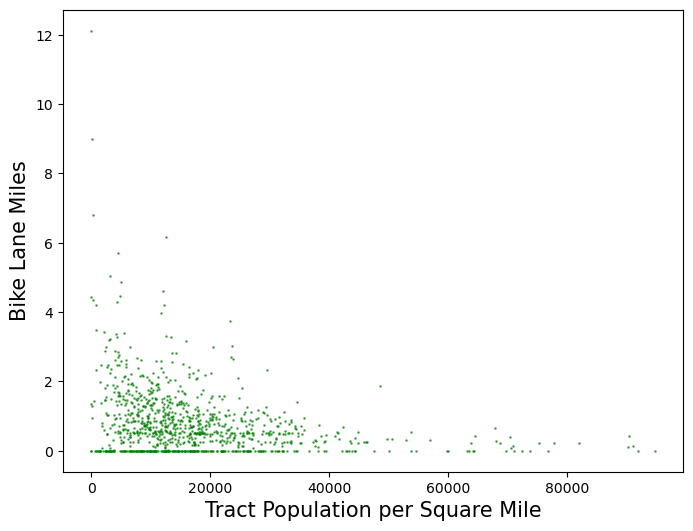

In [58]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
foo = ax.scatter(transpo_index['PopSqMi'], transpo_index['BK_LN_Mi'], c='g', alpha=0.6, s=0.8)
ax.set_xlabel("Tract Population per Square Mile", fontsize=15)
_ = ax.set_ylabel('Bike Lane Miles', fontsize=15)

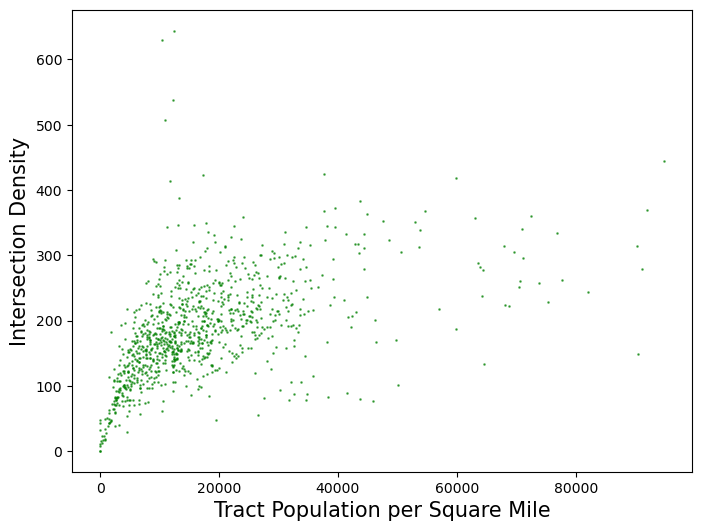

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))
foo = ax.scatter(transpo_index['PopSqMi'], transpo_index['INTRSC_D'], c='g', alpha=0.6, s=0.8)
ax.set_xlabel("Tract Population per Square Mile", fontsize=15)
_ = ax.set_ylabel('Intersection Density', fontsize=15)

<Axes: >

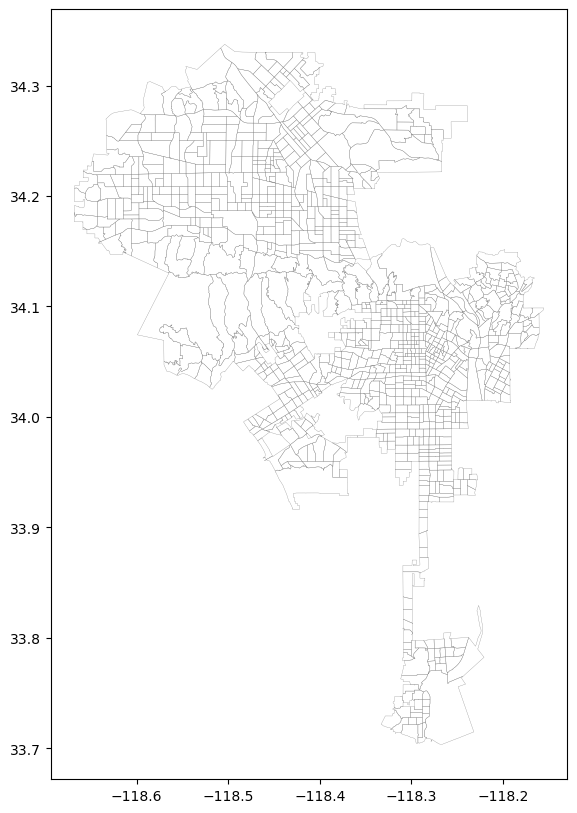

In [8]:
transpo_index.plot(color='none', edgecolor='gray', linewidth=.2, figsize=(14,10))

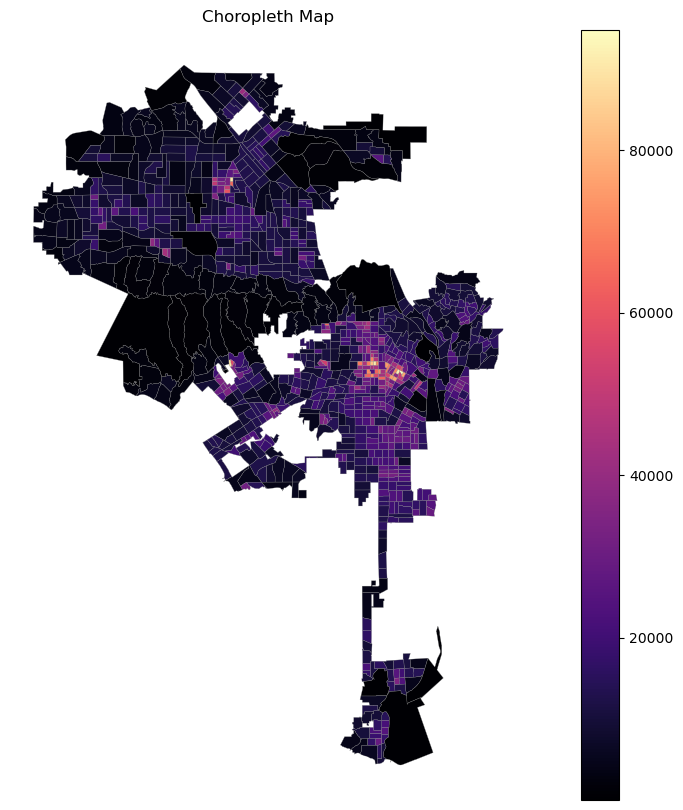

In [75]:
# Plot the choropleth map
fig, ax = plt.subplots(figsize=(14, 10))
transpo_index.plot(column='PopSqMi', cmap='magma', linewidth=0.2, ax=ax, edgecolor='gray', legend=True,)

# Customize the plot (add title, labels, etc.)
ax.set_title('Choropleth Map')
ax.set_axis_off()

# Show the map
plt.show()

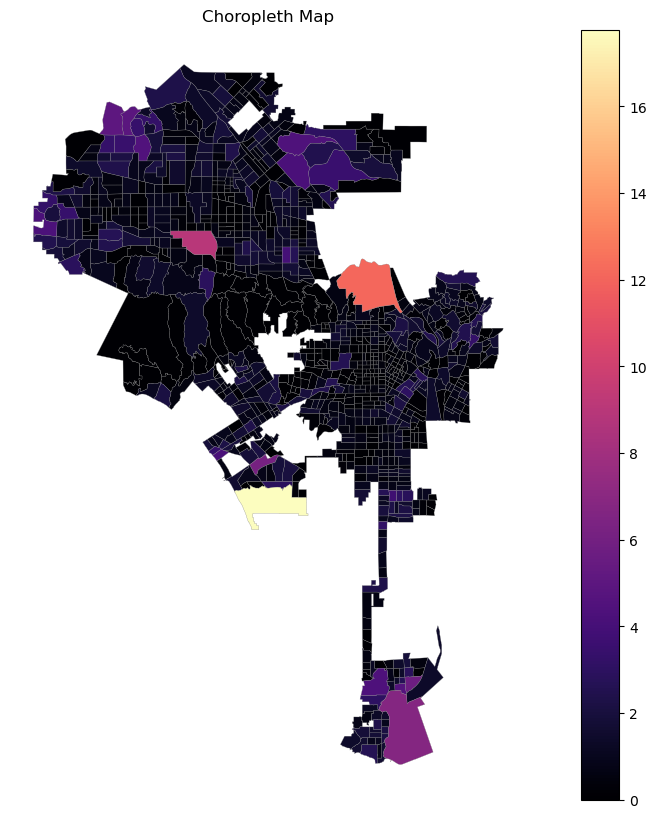

In [77]:
# Plot the choropleth map
fig, ax = plt.subplots(figsize=(14, 10))
transpo_index.plot(column='BK_LN_Mi', cmap='magma', linewidth=0.2, ax=ax, edgecolor='gray', legend=True,)

# Customize the plot (add title, labels, etc.)
ax.set_title('Choropleth Map')
ax.set_axis_off()

# Show the map
plt.show()

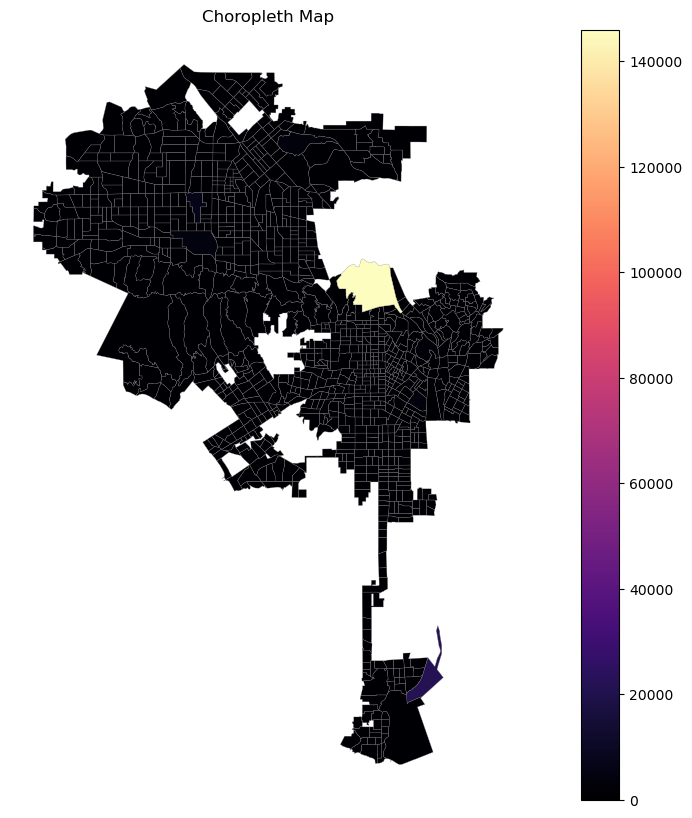

In [83]:
# Plot the choropleth map
fig, ax = plt.subplots(figsize=(14, 10))
transpo_index.plot(column='MV_BP_HIT_10k', cmap='magma', linewidth=0.2, ax=ax, edgecolor='gray', legend=True,)

# Customize the plot (add title, labels, etc.)
ax.set_title('Choropleth Map')
ax.set_axis_off()

# Show the map
plt.show()

In [86]:
#locate huge outlier
high = transpo_index['MV_BP_HIT_10k'].dropna().quantile(.99)
print(high)
#clean_ti_hit_10k = transpo_index.drop(transpo_index[transpo_index['MV_BP_HIT_10k'] == 146000].index)

890.3912853645147


In [87]:
clean_ti_hit_10k = transpo_index[(transpo_index['MV_BP_HIT_10k'] < high)].copy()

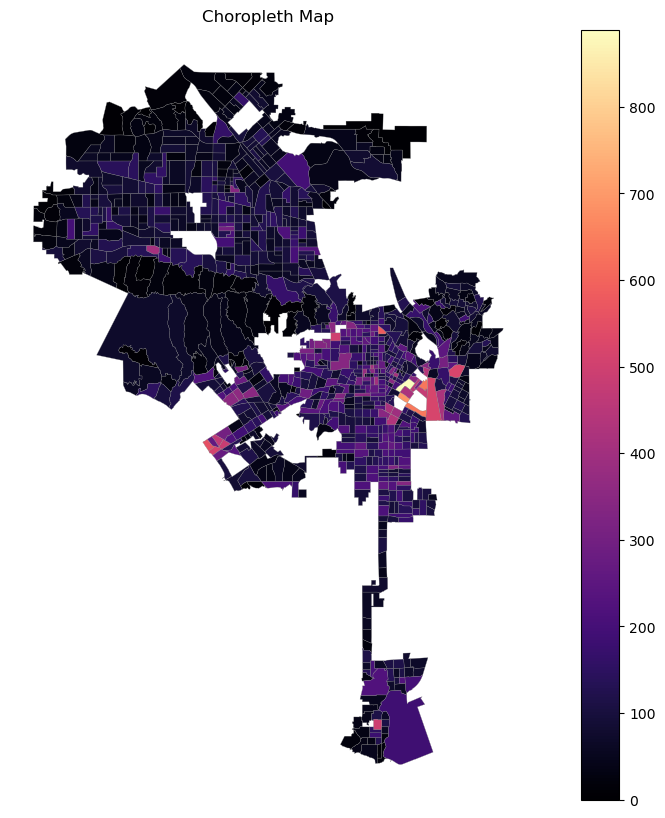

In [88]:
# Plot the choropleth map
fig, ax = plt.subplots(figsize=(14, 10))
clean_ti_hit_10k.plot(column='MV_BP_HIT_10k', cmap='magma', linewidth=0.2, ax=ax, edgecolor='gray', legend=True,)

# Customize the plot (add title, labels, etc.)
ax.set_title('Choropleth Map')
ax.set_axis_off()

# Show the map
plt.show()

#still some large outliers

In [9]:
laahp_endpoint_url = "https://data.lacity.org/resource/mymu-zi3s.json"
response = requests.get(laahp_endpoint_url)

In [10]:
results = response.text
print(type(results))
print(results[:500])

<class 'str'>
[{"apn":"5143020023","project_number":"02-118256","name":"SAN LUCAS APARTMENTS","development_stage":"In-Service","construction_type":"NEW CONSTRUCTION","address":"1221 W 7TH ST  Los Angeles, CA 90017","council_district":"1","site_cd":"1","community":"WESTLAKE","site_units":"196","project_total_units":"196","housing_type":"SENIORS","supportive_housing":"No","sh_units_per_site":"0","date_funded":"2001-11-29T00:00:00.000","hcidla_funded":"0","leverage":"0","tax_exempt_conduit_bond":"0","tdc":"0","i


In [34]:
laahp = pd.read_json(laahp_endpoint_url)
laahp.head()

,apn,project_number,name,development_stage,construction_type,address,council_district,site_cd,community,site_units,...,latitude,geocoded_column,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,:@computed_region_qz3q_ghft,jobs,contract_numbers
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,...,34.05209,"{'type': 'Point', 'coordinates': [-118.26681, ...",564,1047,54.0,11.0,76.0,23078,NaN,NaN
1,5502031011,14-121509,WILSHIRE TOWERS,In-Service,ACQUISITION + REHAB,"616 S NORMANDIE AVE Los Angeles, CA 90005",10,1,KOREATOWN,283,...,34.06301,"{'type': 'Point', 'coordinates': [-118.30016, ...",598,1261,NaN,12.0,89.0,22722,NaN,NaN
2,5525004023,18-125504,POINTE ON LA BREA,In-Service,NEW CONSTRUCTION,"849 N LA BREA AVE LOS ANGELES, CA 90038",5,1,MELROSE,50,...,34.08646,"{'type': 'Point', 'coordinates': [-118.34425, ...",446,805,NaN,6.0,26.0,23677,218.0,C-139292
3,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,34.03071,"{'type': 'Point', 'coordinates': [-118.34182, ...",668,925,7.0,12.0,17.0,23077,NaN,NaN
4,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,34.01115,"{'type': 'Point', 'coordinates': [-118.25748, ...",712,892,7.0,13.0,6.0,22727,226.0,C-129358


In [54]:
laahp.describe()

,apn,council_district,site_cd,site_units,project_total_units,sh_units_per_site,hcidla_funded,leverage,tax_exempt_conduit_bond,tdc,longitude,latitude,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,:@computed_region_qz3q_ghft,jobs
count,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,570.000000,570.000000,570.000000,570.000000,258.000000,566.000000,545.000000,570.000000,415.000000
mean,4.932518e+09,8.382456,2.094737,54.670175,91.361404,19.103509,4.077049e+06,1.622198e+07,3.021390e+06,2.332042e+07,-118.307726,34.054744,581.412281,840.717544,12.821705,10.053004,43.928440,21863.577193,193.453012
std,1.146126e+09,4.674394,2.809376,49.029599,66.258528,30.954383,4.327394e+06,1.288361e+07,9.896369e+06,1.743079e+07,0.075735,0.092147,258.018651,326.068436,13.434058,3.639608,26.231163,4322.753642,146.352206
min,2.103009e+09,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-118.606390,33.736140,6.000000,98.000000,1.000000,1.000000,1.000000,3221.000000,5.000000
25%,5.046754e+09,5.250000,1.000000,21.000000,49.000000,0.000000,0.000000e+00,7.315242e+06,0.000000e+00,1.306244e+07,-118.320503,34.013325,447.500000,555.000000,7.000000,8.000000,19.000000,22721.250000,84.500000
50%,5.142518e+09,9.000000,1.000000,49.000000,72.000000,0.000000,3.007332e+06,1.331726e+07,0.000000e+00,1.868208e+07,-118.285480,34.047935,570.000000,898.000000,7.000000,11.000000,45.000000,23078.000000,174.000000
75%,5.502020e+09,13.000000,1.000000,75.000000,102.750000,36.000000,6.328587e+06,2.236827e+07,4.375750e+06,2.962620e+07,-118.263375,34.086415,729.000000,1047.000000,10.000000,13.000000,67.000000,23668.000000,261.500000
max,7.455014e+09,15.000000,20.000000,438.000000,438.000000,262.000000,2.480000e+07,9.407772e+07,1.842604e+08,2.230181e+08,-118.165250,34.324020,2330.000000,1521.000000,54.000000,15.000000,95.000000,26327.000000,1165.000000


In [36]:
laahp.columns

Index(['apn', 'project_number', 'name', 'development_stage',
       'construction_type', 'address', 'council_district', 'site_cd',
       'community', 'site_units', 'project_total_units', 'housing_type',
       'supportive_housing', 'sh_units_per_site', 'date_funded',
       'hcidla_funded', 'leverage', 'tax_exempt_conduit_bond', 'tdc',
       'in_service_date', 'developer', 'management_company', 'contact_phone',
       'photo', 'reporturl2', 'date_stamp', 'longitude', 'latitude',
       'geocoded_column', ':@computed_region_k96s_3jcv',
       ':@computed_region_tatf_ua23', ':@computed_region_ur2y_g4cx',
       ':@computed_region_kqwf_mjcx', ':@computed_region_2dna_qi2s',
       ':@computed_region_qz3q_ghft', 'jobs', 'contract_numbers'],
      dtype='object')

In [12]:
#review sites with 0 units, group by community, group by council district

In [53]:
cleaned_laahp = laahp[laahp['project_total_units'] > 1]
cleaned_laahp.describe()

,apn,council_district,site_cd,site_units,project_total_units,sh_units_per_site,hcidla_funded,leverage,tax_exempt_conduit_bond,tdc,longitude,latitude,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,:@computed_region_qz3q_ghft,jobs
count,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,570.000000,570.000000,570.000000,570.000000,258.000000,566.000000,545.000000,570.000000,415.000000
mean,4.932518e+09,8.382456,2.094737,54.670175,91.361404,19.103509,4.077049e+06,1.622198e+07,3.021390e+06,2.332042e+07,-118.307726,34.054744,581.412281,840.717544,12.821705,10.053004,43.928440,21863.577193,193.453012
std,1.146126e+09,4.674394,2.809376,49.029599,66.258528,30.954383,4.327394e+06,1.288361e+07,9.896369e+06,1.743079e+07,0.075735,0.092147,258.018651,326.068436,13.434058,3.639608,26.231163,4322.753642,146.352206
min,2.103009e+09,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-118.606390,33.736140,6.000000,98.000000,1.000000,1.000000,1.000000,3221.000000,5.000000
25%,5.046754e+09,5.250000,1.000000,21.000000,49.000000,0.000000,0.000000e+00,7.315242e+06,0.000000e+00,1.306244e+07,-118.320503,34.013325,447.500000,555.000000,7.000000,8.000000,19.000000,22721.250000,84.500000
50%,5.142518e+09,9.000000,1.000000,49.000000,72.000000,0.000000,3.007332e+06,1.331726e+07,0.000000e+00,1.868208e+07,-118.285480,34.047935,570.000000,898.000000,7.000000,11.000000,45.000000,23078.000000,174.000000
75%,5.502020e+09,13.000000,1.000000,75.000000,102.750000,36.000000,6.328587e+06,2.236827e+07,4.375750e+06,2.962620e+07,-118.263375,34.086415,729.000000,1047.000000,10.000000,13.000000,67.000000,23668.000000,261.500000
max,7.455014e+09,15.000000,20.000000,438.000000,438.000000,262.000000,2.480000e+07,9.407772e+07,1.842604e+08,2.230181e+08,-118.165250,34.324020,2330.000000,1521.000000,54.000000,15.000000,95.000000,26327.000000,1165.000000


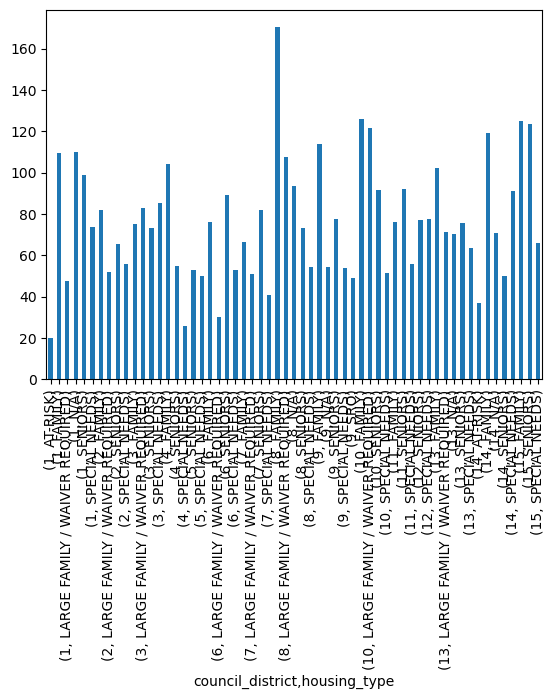

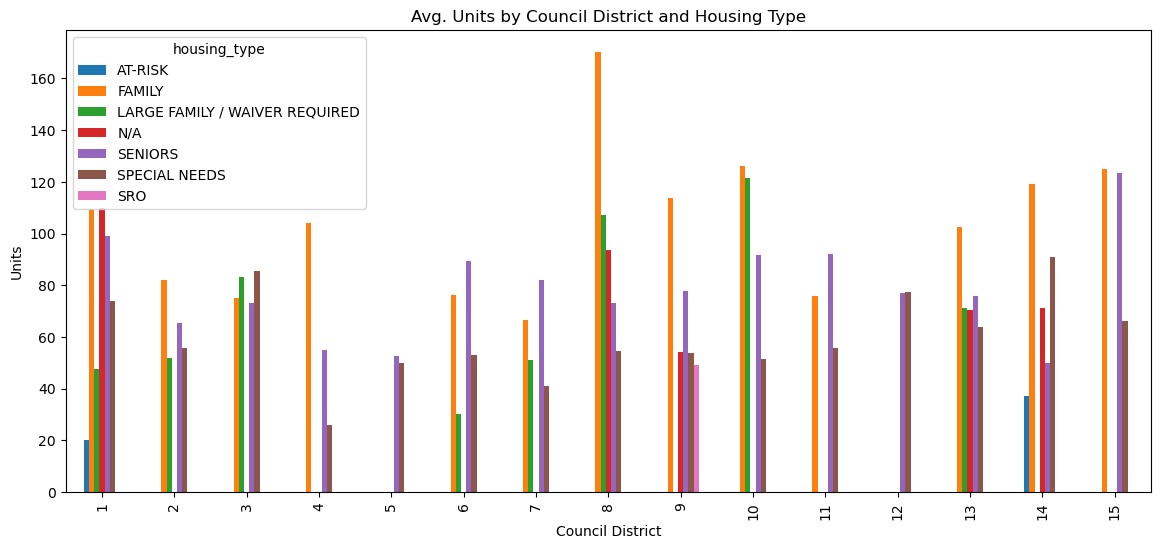

In [52]:
laahp.groupby(['council_district', 'housing_type'])['project_total_units'].mean().plot(kind='bar')
_ = laahp.groupby(['council_district', 'housing_type'])['project_total_units'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg. Units by Council District and Housing Type', ylabel='Units', xlabel='Council District')

In [45]:
ht_totals = laahp[['housing_type', 'project_total_units']].groupby('housing_type').sum()
ht_totals

,project_total_units
housing_type,
AT-RISK,57
FAMILY,28764
LARGE FAMILY / WAIVER REQUIRED,1775
N/A,1439
SENIORS,7639
SPECIAL NEEDS,12353
SRO,49


In [46]:
cd_totals = laahp[['council_district', 'project_total_units']].groupby('council_district').sum()
cd_totals

,project_total_units
council_district,
1,10068
2,1009
3,706
4,809
5,261
6,2230
7,1059
8,7942
9,6147


In [47]:
nhbd_totals = laahp[['community', 'project_total_units']].groupby('community').sum()
nhbd_totals

,project_total_units
community,
ADAMS-NORMANDIE,328
ALSACE,251
ANGELINO HEIGHTS,33
ATWATER VILLAGE,347
BALDWIN HILLS,172
...,...
WESTLAKE,3746
WHOLESALE DISTRICT,2809
WILMINGTON,592


Analysis & Proposal

The data from the LA Transportation Index and the LA Affordable Housing Projects Pipeline both paint interesting pictures on the topics of transportation and land use. The opportunity and political will to prioritize affordable housing is noticable in the grouped projects by council district area. Council districts 1 and 8 have a huge pipeline of projects with a variety of housing types but council district 5 and 12 are not investing as much in affordable housing. The Transportation Index paints an interesting picture because of the large variance between census tracts in the city. Some areas of LA have very high and low population density leading to outliers in most of the value fields. I think the biggest hurdle will be deciding what data to remove.

Research Question: Are affordable housing projects being developed in transportation secure areas?

Plan:
Utilize the transportation index in addition to Transit and Vision Zero data to spatially compare the transportation security of affordable housing planned to be built in Los Angeles. The Affordable Housing Pipeline data is geocoded to a point location and the transportation index is geocoded to a census tract polygon. The transportation index is unfortunately not the most clear with its measures and a codebook is not shared. However some information is still easy to understand. I am seeking also tie in census data like commute and vehicle ownership. Through this project I want to learn how to integrate data from the GTFS feeds from LA Metro to also juxtapose the project's proximity to stations.

I am interested in combining multiple layers to compare to the census tract the housing project is situation in. Is there a way to geocode a point to an existing polygon in another layer?  By adding the census tract of each project it will be easier to merge the data sets to run regressions and measure the correlation of housing projects and the transportation characteristics of the neighborhood. 
